# Download and install packages

In [1]:
!wget https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/finetune_pretrained_t5.py
!pip install sacrebleu
!wget https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/t5_translate.py
!wget https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/plot_train_val_new.py
!pip -q install evaluate sacrebleu

--2026-02-25 08:14:01--  https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/finetune_pretrained_t5.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14234 (14K) [text/plain]
Saving to: ‘finetune_pretrained_t5.py’

finetune_pretrained 100%[===================>]  13.90K  --.-KB/s    in 0.001s  

2026-02-25 08:14:01 (26.1 MB/s) - ‘finetune_pretrained_t5.py’ saved [14234/14234]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 4.1 MB/s eta 0:00:00
--2026-02-25 08:14:06--  https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/t5_translate.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubuser

# Actual training

Note that we reduced the `batch-size` to `8` in order not to run into memory problems

In [2]:
!python finetune_pretrained_t5.py \
  --pretrained-model google/mt5-small \
  --src-file /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/train.en \
  --tgt-file /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/train.nl \
  --src-val /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/dev.en \
  --tgt-val /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/dev.nl \
  --epochs 10 --batch-size 8 --lr 5e-5 \
  --save mt5_en_nl \
  --eval-metrics --history-json mt5.hist \
  --show-val-examples 5 \
  --max-src-len 128 --max-tgt-len 128 \
  --num-beams 4 --max-gen-len 128


E0000 00:00:1772007267.134156      60 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772007267.195812      60 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772007267.713883      60 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772007267.713952      60 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772007267.713956      60 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772007267.713961      60 computation_placer.cc:177] computation placer already registered. Please check linka

# Translation and evaluation

In [3]:
!python t5_translate.py \
  --model-dir mt5_en_nl \
  --src-file /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/test.en \
  --out-file test.mt5.nl \
  --ref-file /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/test.nl \
  --metrics bleu,chrf \
  --batch-size 32 \
  --max-src-len 128 \
  --max-gen-len 128 \
  --num-beams 4


2026-02-25 13:48:40.492275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1772027320.519845   98177 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1772027320.527799   98177 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1772027320.557125   98177 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772027320.557156   98177 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1772027320.557159   98177 computation_placer.cc:177] computation placer alr

In [4]:
!head -n 20 test.mt5.nl

We hebben een interessant boek in het Duits.
De gesprek ging naar politiek.
We hebben drie vliegtuigen.
Als het idee aankomt, zou het een eind kunnen maken aan verkeersongevallen.
Ik heb een zoon en een dochter. De andere is in New York en de andere in Londen.
Omdat ik het zo vaak hoorde, kan ik het lied nu door het hart reciteren.
Katten haat meestal honden.
Ik wil niet onder deze omstandigheden werken.
Waar woont jouw grootmoeder?
Tom en Maria besloten te blijven.
Ze kon haar dochter niet uithouden.
Angola werd onafhankelijk in 1975.
Het meisje liet de vogel uit.
Ik kan de computer niet repareren.
Is dat Tom?
Ik wacht op de nummer dertien bus.
Dit is de enige weg weg.
Waar heb je pijn?
Tom vroeg of iemand iets over Maria wist.
Ik zal je naar huis nemen.


# CHARTS

In [5]:
from IPython.display import Image, display



Saved plot to mt5_train_val.png


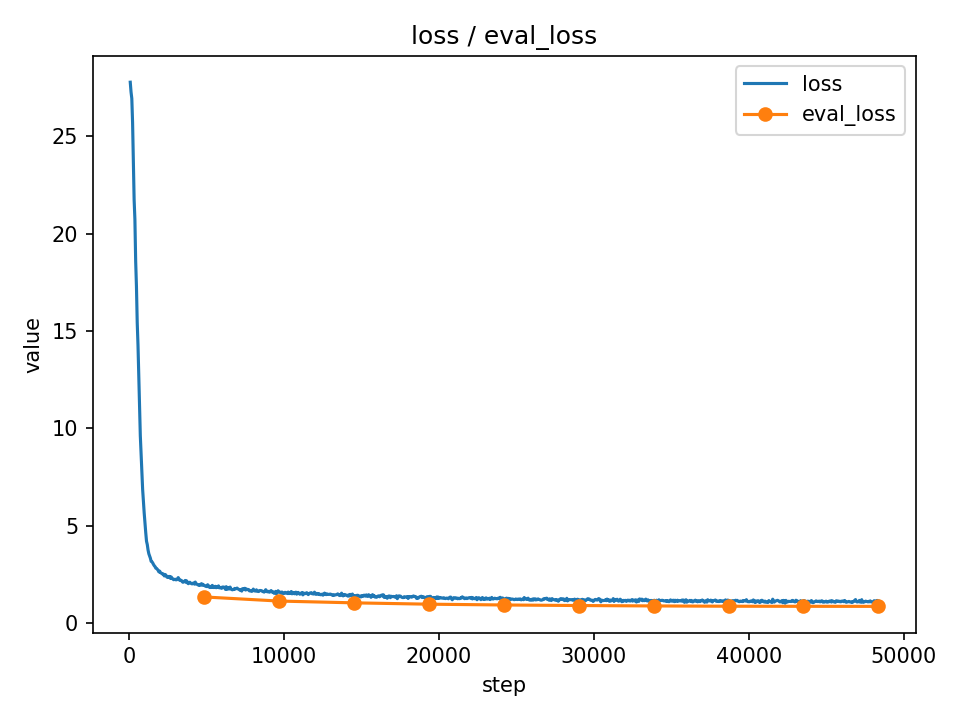

In [6]:
!python plot_train_val_new.py mt5.hist --train-key loss --val-key eval_loss --save mt5_train_val.png

display(Image(filename="mt5_train_val.png"))



Saved plot to mt5_bleu.png


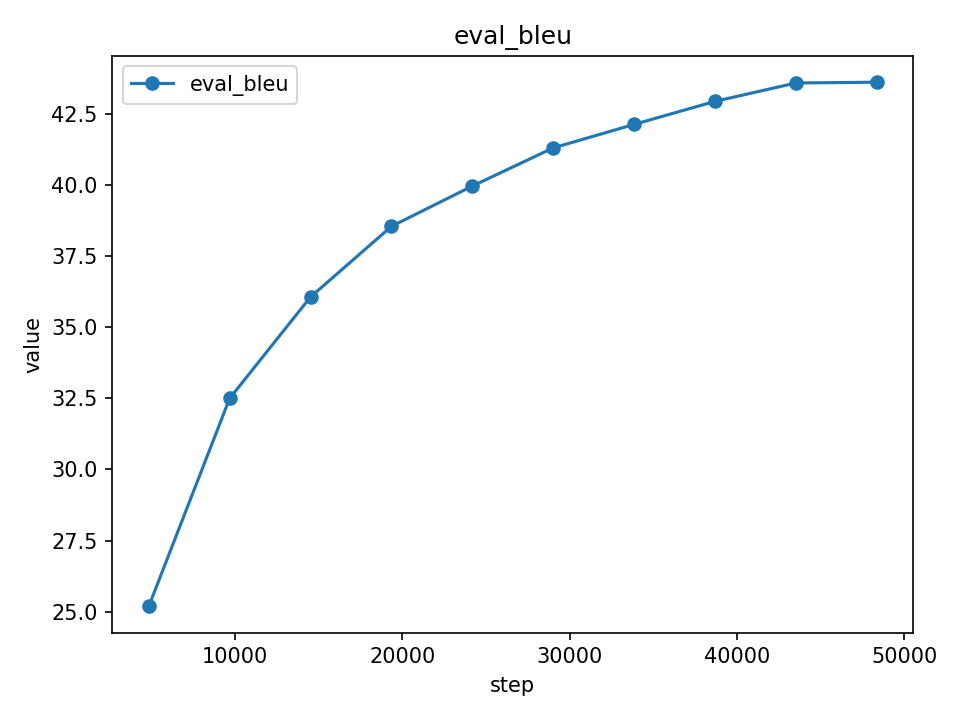

In [7]:
!python plot_train_val_new.py mt5.hist \
  --val-key eval_bleu \
  --save mt5_bleu.png

display(Image(filename="mt5_bleu.png"))